In [25]:
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [26]:
file_path = '../img/license1.jpeg'

In [27]:
def imshow(img):
    plt.figure(figsize=(15,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

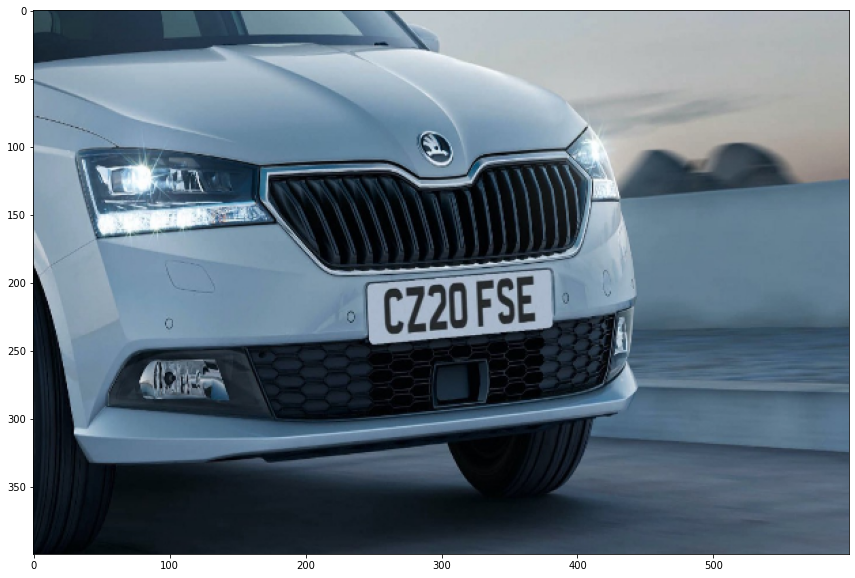

In [35]:
img = cv2.imread(file_path,cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400))
imshow(img)

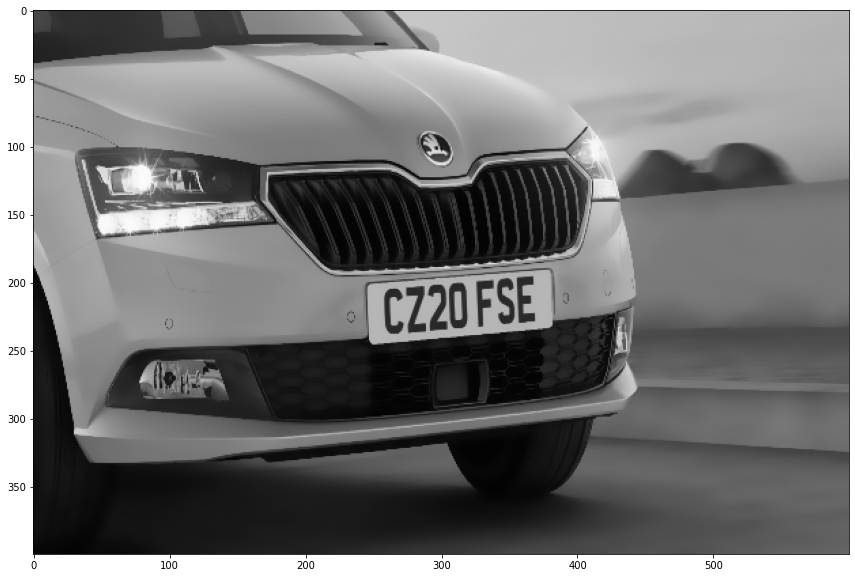

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

gray = cv2.bilateralFilter(gray, 13, 15, 15) 
imshow(gray)

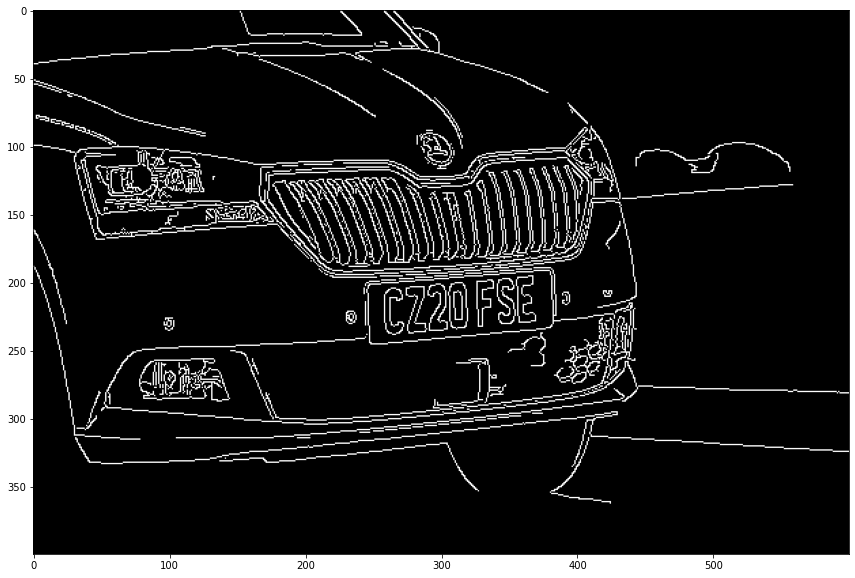

In [37]:
edged = cv2.Canny(gray, 30, 200) 
imshow(edged)

In [38]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

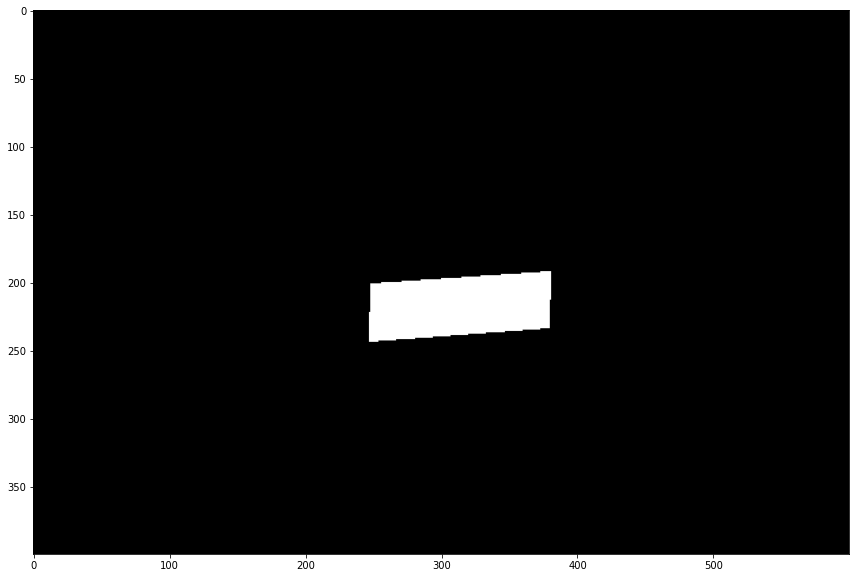

Detected license plate Number is: C220 FSE.



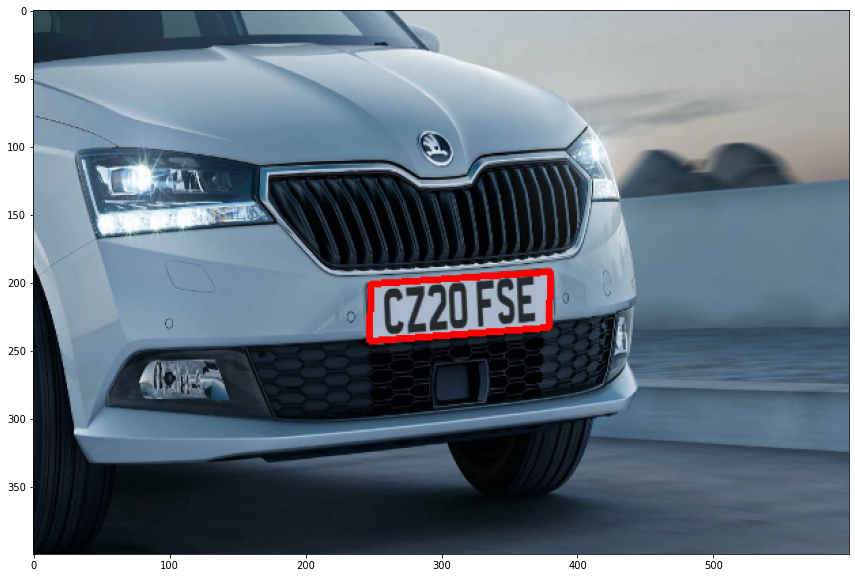

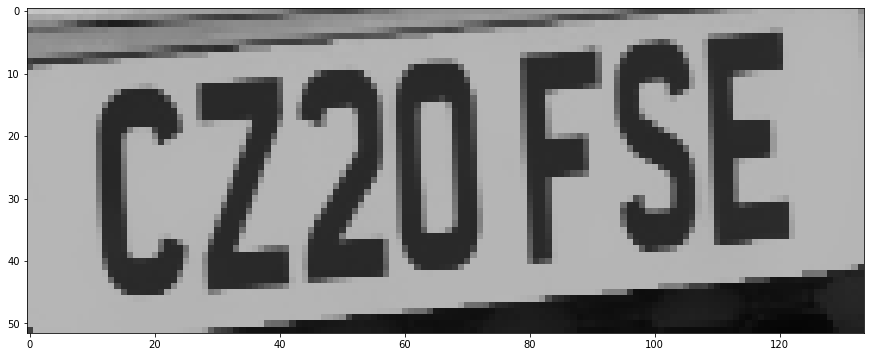

In [41]:
screenCnt = None

for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)

    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    print("No contour detected")
else:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
    
    mask = np.zeros(gray.shape,np.uint8)
    cv2.drawContours(mask,[screenCnt],0,255,-1,)
    cv2.bitwise_and(img,img,mask=mask)
    imshow(mask)
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    cropped = gray[topx:bottomx+1, topy:bottomy+1]
    
    text = pytesseract.image_to_string(cropped, config='--psm 8')
    print("Detected license plate Number is:",text)
    imshow(img)
    imshow(cropped)

In [23]:
text = pytesseract.image_to_string(cropped, config='--psm 8')

print("Detected license plate Number is:",text)

Detected license plate Number is: C220 FSE.

